In [10]:
%matplotlib inline
import numpy as np       # linear algebra
import pandas as pd      # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize

from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, plot_precision_recall_curve, f1_score, confusion_matrix 

# Import any other libraries you may need such as
# average_precision_score, plot_precision_recall_curve, f1_score, confusion_matrix

In [11]:
performances = pd.read_csv('performances.csv')

In [12]:
performances.head()

,ground_truth,probability
0,1,0.99
1,1,0.98
2,1,0.97
3,1,0.96
4,1,0.95


In [13]:
performances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ground_truth  679 non-null    int64  
 1   probability   679 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.7 KB


### Exercise

In [14]:
# function to plot the roc_curve. You can utilize roc_curve and auc imported above
def plot_roc_curve(ground_truth, probability):
    ## YOUR CODE HERE
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    fpr, tpr, thresholds = roc_curve(ground_truth, probability)
    ax.plot(fpr, tpr, label='%s (AUC:%0.2f)' % ('Pneumonia', auc(fpr,tpr)))
    ax.legend()
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    pass
    
# function to plot the precision_recall_curve. You can utilizat precision_recall_curve imported above
def plot_precision_recall_curve(ground_truth, probability):
    ## YOUR CODE HERE
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    precision, recall, threshold = precision_recall_curve(ground_truth, probability)
    ax.plot(recall, precision, label='%s (AP Score:%0.2f)' %('Pneumonia', average_precision_score(ground_truth, probability)))
    ax.legend()
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    pass

# function to calculate the F1 score
def calc_f1(prec,recall):
    return 2*(prec*recall)/(prec+recall)

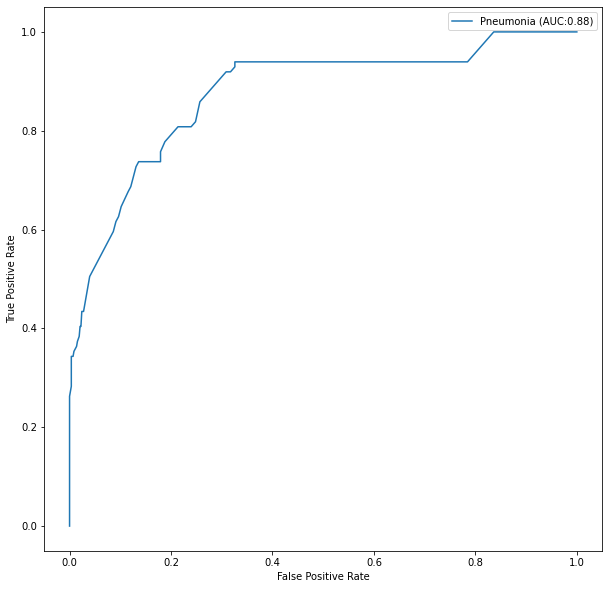

In [15]:
plot_roc_curve(performances['ground_truth'],performances['probability'])

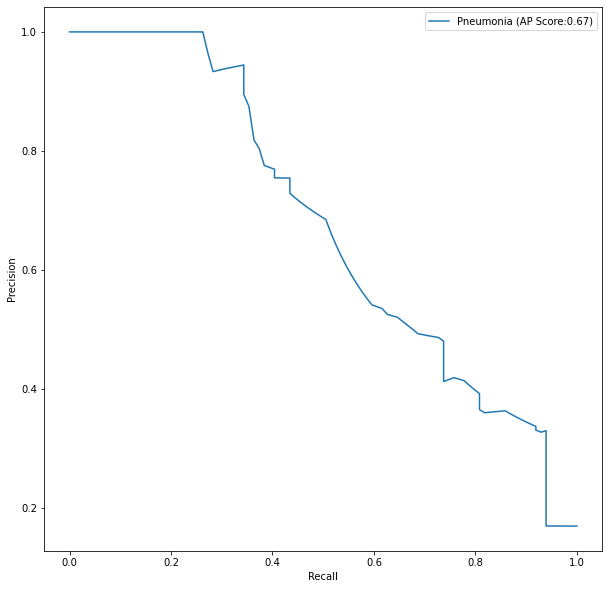

In [16]:
plot_precision_recall_curve(performances['ground_truth'],performances['probability'])

### Calculate F1 Score
Calculate F1 score for two different scenarios here, 
1. Choose a threshold that favors precision, 
2. Choose a threshold that favors recall

Print the precision, recall, threshold, and F1 score for each scenario. 

In [30]:
def cal_f1(recall, precision):
    return 2*(recall * precision)/(recall+precision)

In [31]:
precision, recall, threshold = precision_recall_curve(performances['ground_truth'], performances['probability'])

### 1. Choose a threshold that favors precision

In [33]:
# Let assume our precision is 0.9, the we need to find the corresponding threshold and recall value
prec_val = 0.9
idx = (np.abs(precision - prec_val)).argmin()
print('Precision: ',precision[idx])
print('Recall; ',recall[idx])
print('Threshold: ',threshold[idx])
print('F1 Score: ', cal_f1(recall[idx], precision[idx]))

Precision:  0.8947368421052632
Recall;  0.3434343434343434
Threshold:  0.82
F1 Score:  0.49635036496350365


### 2. Choose a threshold that favors recall

In [34]:
recall_val = 0.9
idx = (np.abs(recall - recall_val)).argmin()
print('Precision: ',precision[idx])
print('Recall; ',recall[idx])
print('Threshold: ',threshold[idx])
print('F1 Score: ', cal_f1(recall[idx], precision[idx]))

Precision:  0.3449612403100775
Recall;  0.898989898989899
Threshold:  0.29
F1 Score:  0.4985994397759104


### Examine the _accuracy_ under the two scenarios
Now look at what the _accuracy_ of our model would be using those two threshold values. **Hint, you can add a new column with value 0 or 1 as predictions based on the threshold you choose, then you can calculate accuracy using ground truth and the prediction you just made.**

Print the _accuracy_ in both the cases, and think about why accuracy really isn't a great performance statistic when evaluating and interpreting the utility of our models. 

In [35]:
### YOUR CODE HERE 
prob = performances['probability']
case1 = (prob > 0.82)
case2 = (prob > 0.29)

In [39]:
case1 = case1.replace(True, 1).replace(False, 0)
case2 = case2.replace(True, 1).replace(False, 0)

In [42]:
compare_case1 = (case1 == performances['ground_truth'])
compare_case2 = (case2 == performances['ground_truth'])

In [44]:
print('Accuracy at 1st threshold: ', len(compare_case1[compare_case1])/len(performances))

Accuracy at 1st threshold:  0.8998527245949927


In [45]:
print('Accuracy at 2nd threshold: ', len(compare_case2[compare_case2])/len(performances))

Accuracy at 2nd threshold:  0.7422680412371134
